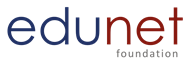

# Edunet Foundation : Class Room Exercises

#  Lab 16:   Perform image thresholding, annotation, and image resizing by OpenCV 

### Objective:
The "Handling the Image Representation using Python OpenCV" lab aims to provide learners with the skills to effectively manipulate and process images using Python and the OpenCV library. The lab covers fundamental concepts of image representation, including pixel operations, color spaces, and image transformations. Learners will gain hands-on experience in reading, writing, and displaying images, as well as performing tasks such as resizing, cropping, and rotating images. By the end of the lab, learners will be equipped to handle various image processing tasks using OpenCV, enabling them to apply these techniques in fields such as computer vision and digital imaging.

In [ ]:
!pip install opencv-python

## Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [2]:
print("OpenCV-Python Version %s" % cv2.__version__)

OpenCV-Python Version 4.8.0


## Display Image Directly
We will use the ipython image function to load and display the image.

In [3]:
# Display 18x18 pixel image.
Image('checkerboard_18x18.png')

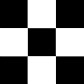

In [4]:
# Display 84x84 pixel image.
Image(filename='checkerboard_84x84.jpg') 

## Reading images using OpenCV

OpenCV allows reading different types of images (JPG, PNG, etc). You can load grayscale images, color images. It uses the **`cv2.imread()`** function which has the following syntax:

### Function Syntax
``` python
retval = cv2.imread( filename[, flags] )
```

`retval`: Is the image if it is successfully loaded. Otherwise it is `None`. This may happen if the filename is wrong or the file is corrupt.

The function has **1 required input argument** and one optional flag:


1. `filename`: This can be an **absolute** or **relative** path. This is a **mandatory argument**.
2. `Flags`:    These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an **optional argument** with a default value of `cv2.IMREAD_COLOR` or `1` which loads the image as a color image.

Before we proceed with some examples, let's also have a look at some of the `flags` available.

**Flags**
1. **`cv2.IMREAD_GRAYSCALE`** or **`0`**: Loads image in grayscale mode
2. **`cv2.IMREAD_COLOR`** or **`1`**: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3. **`cv2.IMREAD_UNCHANGED`** or **`-1`**: Loads image as such including alpha channel.


### <font color="green">OpenCV Documentation</font>

**`Imread:`**https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56

**`ImreadModes:`** https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80


In [5]:
# Read image as gray scale.
cb_img = cv2.imread("checkerboard_18x18.png",0)

# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits [0,255]
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [6]:
# Display Image attributes
# print the size  of image
print("Image size is ", cb_img.shape)

# print data-type of image
print("Data type of image is ", cb_img.dtype)

Image size is  (18, 18)
Data type of image is  uint8


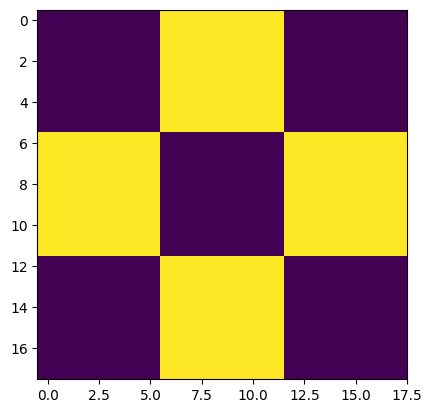

In [7]:
# Display Images using Matplotlib
# Display image.
plt.imshow(cb_img)

### What happened?
Even though the image was read in as a gray scale image, it won't necessarily display in gray scale when using `imshow()`. `matplotlib` uses different color maps and it's possible that the gray scale color map is not set.

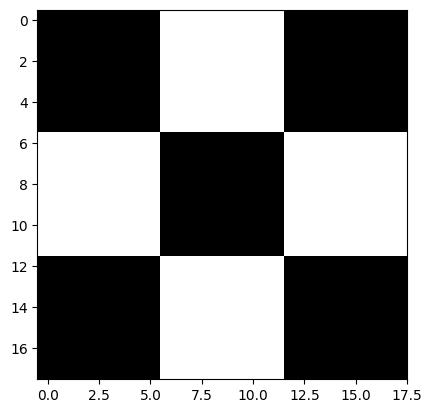

In [8]:
# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap='gray')

## Working with Color Images
Until now, we have been using gray scale images in our discussion. Let us now discuss color images.

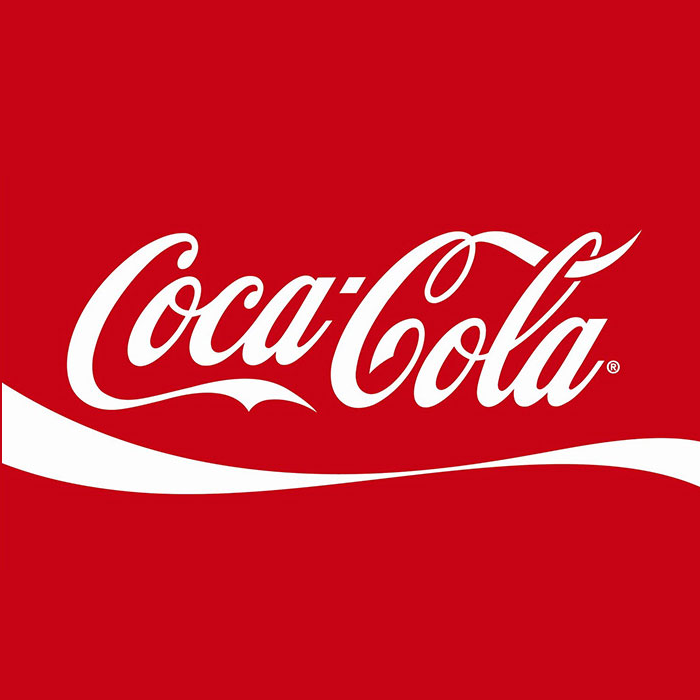

In [9]:
# Read and display Coca-Cola logo.
Image("coca-cola-logo.png")

## Read and display color image
Let us read a color image and check the parameters. Note the image dimension.

In [10]:
# Read in image
coke_img = cv2.imread("coca-cola-logo.png",1)

# print the size  of image
print("Image size is ", coke_img.shape)

# print data-type of image
print("Data type of image is ", coke_img.dtype)

Image size is  (700, 700, 3)
Data type of image is  uint8


In [11]:
print(coke_img)

[[[ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]
  ...
  [ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]]

 [[ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]
  ...
  [ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]]

 [[ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]
  ...
  [ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]]

 ...

 [[ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]
  ...
  [ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]]

 [[ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]
  ...
  [ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]]

 [[ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]
  ...
  [ 21   4 199]
  [ 21   4 199]
  [ 21   4 199]]]


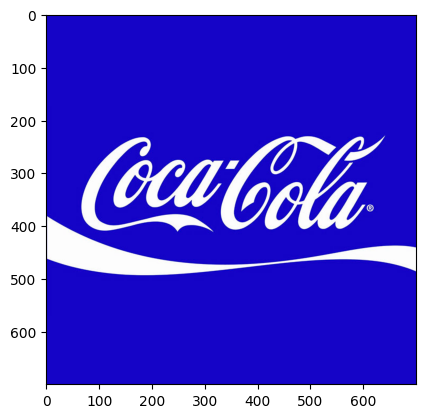

In [12]:
# display the image
plt.imshow(coke_img)

## Reason 
The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. We will discuss about the channels in the sections below.

### Splitting and Merging Color Channels


**`cv2.split()`** Divides a multi-channel array into several single-channel arrays.

**`cv2.merge()`** Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

### OpenCV Documentation

https://docs.opencv.org/4.5.1/d2/de8/group__core__array.html#ga0547c7fed86152d7e9d0096029c8518a


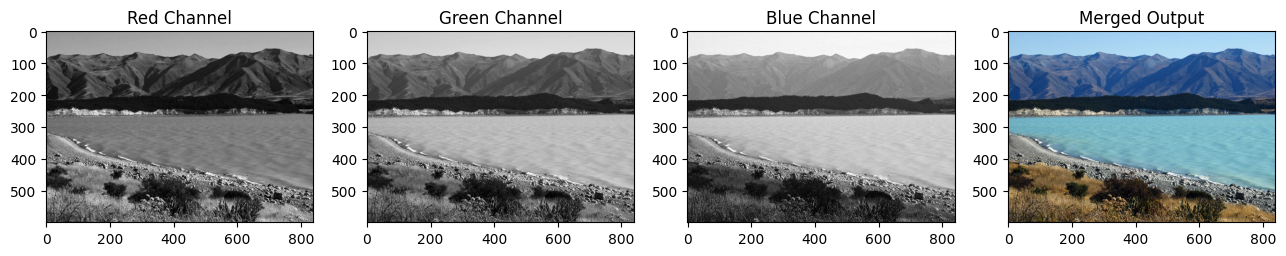

In [13]:
# Split the image into the B,G,R components
img_NZ_bgr = cv2.imread("New_Zealand_Lake.jpg",cv2.IMREAD_COLOR)
b,g,r = cv2.split(img_NZ_bgr)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(151);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(152);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(153);plt.imshow(b,cmap='gray');plt.title("Blue Channel");

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b,g,r))
# Show the merged output
plt.subplot(154);plt.imshow(imgMerged[:,:,::-1]);plt.title("Merged Output");

## Converting to different Color Spaces


**`cv2.cvtColor()`** Converts an image from one color space to another. The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

### <font style="color:rgb(255,0,0)">Function Syntax </font>
``` python
dst = cv2.cvtColor( src, code )
```

`dst`: Is the output image of the same size and depth as `src`.

The function has **2 required arguments**:

1. `src` input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.
2. `code` color space conversion code (see ColorConversionCodes). 

### <font style="color:rgb(255,0,0)">OpenCV Documentation</font>

**`cv2.cvtColor:`** https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab
**`ColorConversionCodes:`** https://docs.opencv.org/4.5.1/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0

### <font style="color:rgb(255,0,255)"> Changing from BGR to RGB</font>

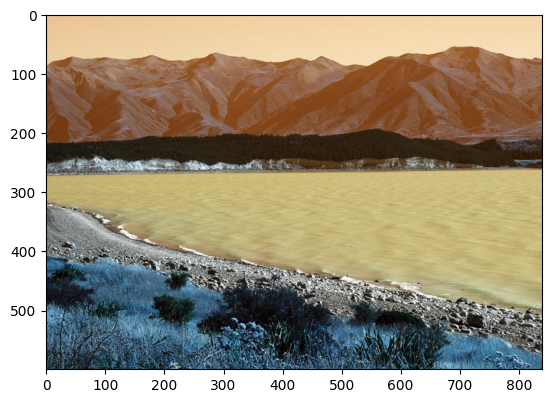

In [15]:
plt.imshow(img_NZ_bgr)

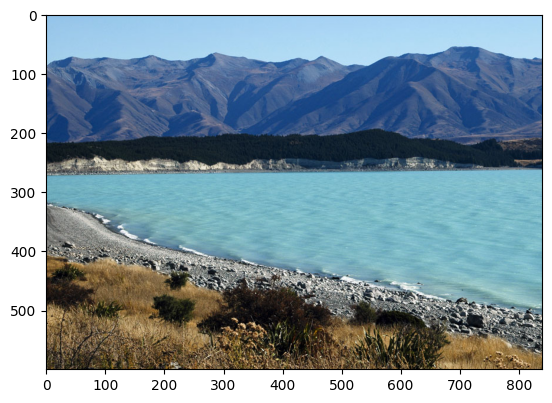

In [14]:
'''
OpenCV stores color channels in a differnet 
#order than most other applications (BGR vs RGB).
'''
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)

plt.imshow(img_NZ_rgb)

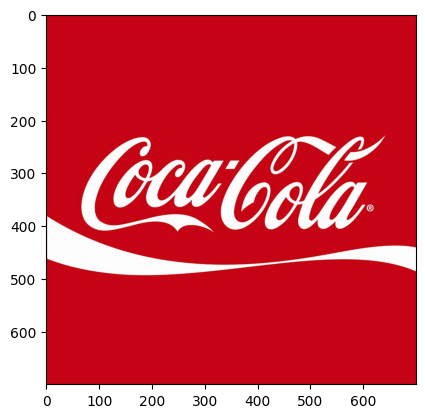

In [16]:
Coke_rgb = cv2.cvtColor(coke_img, cv2.COLOR_BGR2RGB)
plt.imshow(Coke_rgb)

## Saving Images

Saving the image is as trivial as reading an image in OpenCV. We use the function **`cv2.imwrite()`** with two arguments. The first one is the filename, second argument is the image object.

The function imwrite saves the image to the specified file. The image format is chosen based on the filename extension (see cv::imread for the list of extensions). In general, only 8-bit single-channel or 3-channel (with 'BGR' channel order) images can be saved using this function (see the OpenCV documentation for further details).

	
### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
cv2.imwrite( filename, img[, params] )
```

The function has **2 required arguments**:

1. `filename`: This can be an **absolute** or **relative** path. 
2. `img`: Image or Images to be saved.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`Imwrite:`** https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce
**`ImwriteFlags:`**https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac

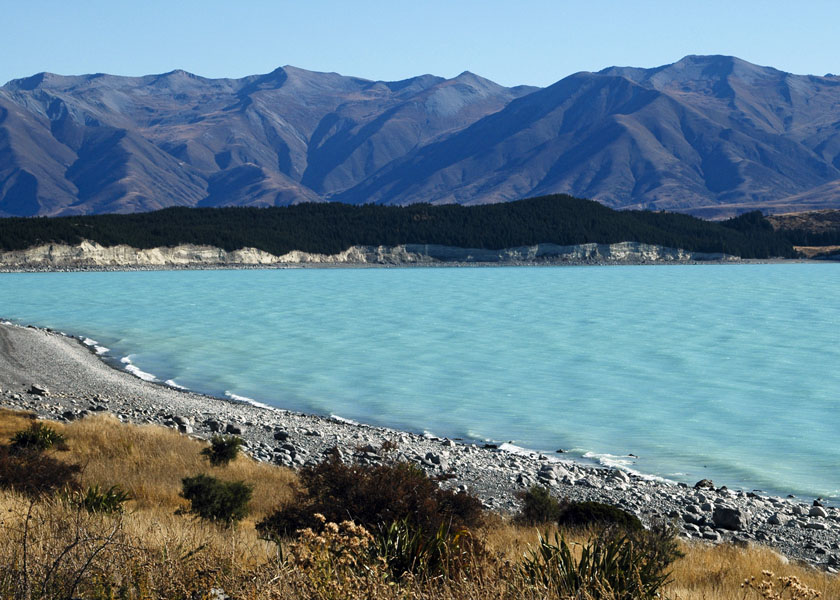

In [17]:
# save the image
cv2.imwrite("New_Zealand_Lake_SAVED.png", img_NZ_bgr)

Image(filename='New_Zealand_Lake_SAVED.png') 

## Accessing Individual Pixels
Let us see how to access a pixel in the image.

For accessing any pixel in a numpy matrix, you have to use matrix notation such as `matrix[r,c]`, where the r is the row number and c is the column number. Also note that the matrix is 0-indexed. 

For example, if you want to access the first pixel, you need to specify `matrix[0,0]`. Let us see with some examples. We will print one black pixel from top-left and one white pixel from top-center.

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

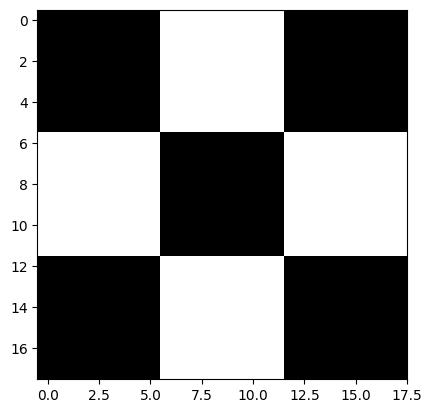

In [18]:
# Read image as gray scale.
cb_img = cv2.imread("checkerboard_18x18.png",0)

# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap='gray')
print(cb_img)

In [19]:
# print the first pixel of the first black box
print(cb_img[0,0])
# print the first white pixel to the right of the first black box
print(cb_img[0,6])

0
255


[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 255 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 255 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

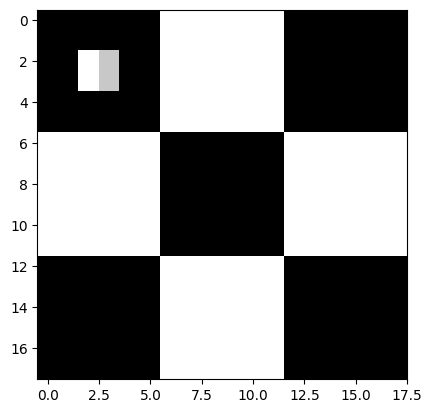

In [20]:
# Modifying Image Pixels
cb_img_copy = cb_img.copy()
cb_img_copy[2,2] = 255
cb_img_copy[2,3] = 200
cb_img_copy[3,2] = 255
cb_img_copy[3,3] = 200

# Same as above
# cb_img_copy[2:3,2:3] = 200

plt.imshow(cb_img_copy, cmap='gray')
print(cb_img_copy)

### Cropping Images

Cropping an image is simply achieved by selecting a specific (pixel) region of the image.

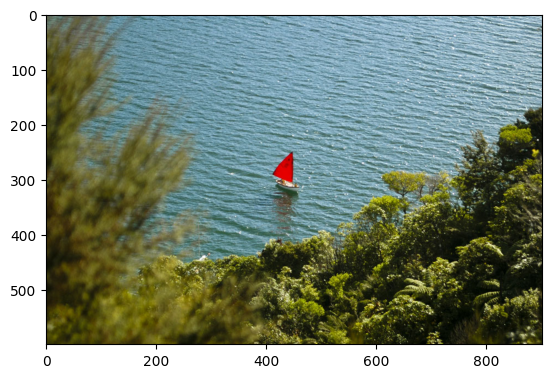

In [21]:
img_NZ_bgr = cv2.imread("New_Zealand_Boat.jpg",cv2.IMREAD_COLOR)
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
#img_NZ_rgb = img_NZ_bgr[:,:,::-1] 

plt.imshow(img_NZ_rgb)

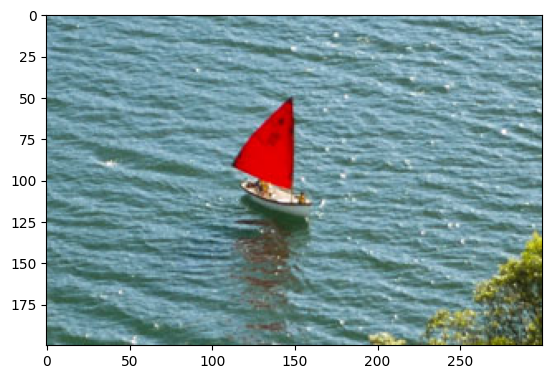

In [22]:
# Crop out the middle region of the image

cropped_region = img_NZ_rgb[200:400, 300:600]
plt.imshow(cropped_region)

# Resizing Images

The function **`resize`** resizes the image `src` down to or up to the specified size. The size and type are derived from the `src`,`dsize`,`fx`, and `fy`.

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )
```

`dst`: output image; it has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.

The function has **2 required arguments**:
    
1. `src`:	input image
2. `dsize`: output image size

Optional arguments that are often used include:

1. `fx`: Scale factor along the horizontal axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜
2. `fy`: Scale factor along the vertical axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜

The output image has the size `dsize` (when it is non-zero) or the size computed from `src.size()`, `fx`, and `fy`; the type of dst is the same as of src.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`resize():`** https://docs.opencv.org/4.5.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d

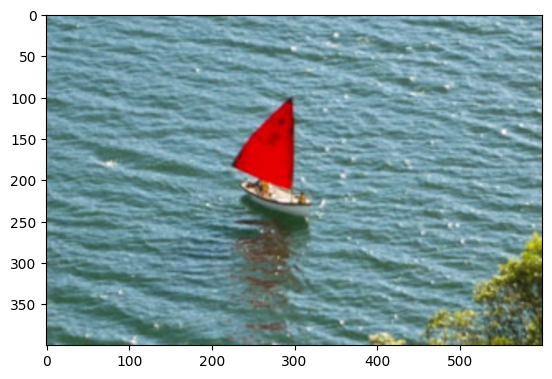

In [23]:
resized_cropped_region_2x = cv2.resize(cropped_region,None,fx=2, fy=2)
plt.imshow(resized_cropped_region_2x)

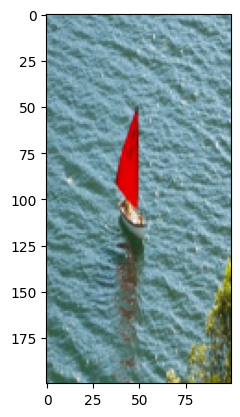

In [24]:
# Specifying exact size of the output image

desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

# Resize background image to sae size as logo image
resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

# Flipping Images


The function **`flip`** flips the array in one of three different ways (row and column indices are 0-based):

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = cv.flip( src, flipCode )
```

`dst`: output array of the same size and type as src.

The function has **2 required arguments**:
    
1. `src`:	input image
2. `flipCode`: a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.


### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`flip:`** https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441

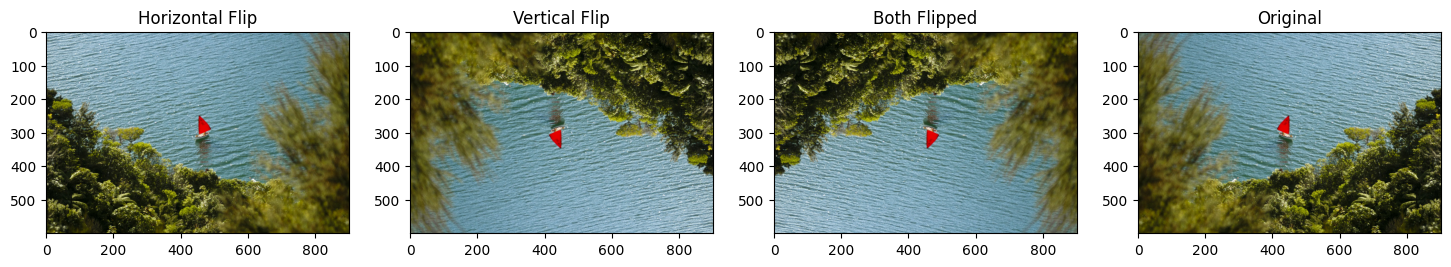

In [25]:
img_NZ_rgb_flipped_horz = cv2.flip(img_NZ_rgb, 1)
img_NZ_rgb_flipped_vert = cv2.flip(img_NZ_rgb, 0)
img_NZ_rgb_flipped_both = cv2.flip(img_NZ_rgb, -1)

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(141);plt.imshow(img_NZ_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(img_NZ_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(img_NZ_rgb_flipped_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(img_NZ_rgb);plt.title("Original");


# Annotating Images
We will learn how to peform the following annotations to images.

* Draw lines
* Draw circles
* Draw rectangles
* Add text

(900, 1200, 3)


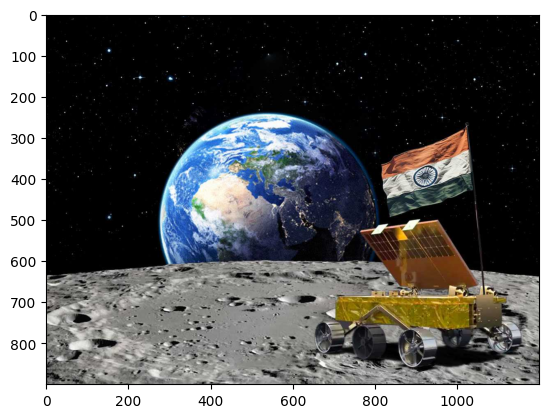

In [26]:
# Read in an image
image = cv2.imread("chandrayaan-3.jpg", cv2.IMREAD_COLOR)
img_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(img_color)
print(image.shape)

# Drawing a Line
Let's start off by drawing a line on an image. We will use cv2.line function for this.

**Function Syntx:::**
    `img = cv2.line(img, pt1, pt2, color[, thickness[, lineType[, shift]]])
img: The output image that has been annotated.`

**The function has 4 required arguments:**

* img: Image on which we will draw a line
* pt1: First point(x,y location) of the line segment
* pt2: Second point of the line segment
* color: Color of the line which will be drawn
* Other optional arguments that are important for us to know include:

thickness: Integer specifying the line thickness. Default value is 1.
lineType: Type of the line. Default value is 8 which stands for an 8-connected line. Usually, cv2.LINE_AA (antialiased or smooth line) is used for the lineType.
OpenCV Documentation
line:https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga7078a9fae8c7e7d13d24dac2520ae4a2

Let's see an example of this.

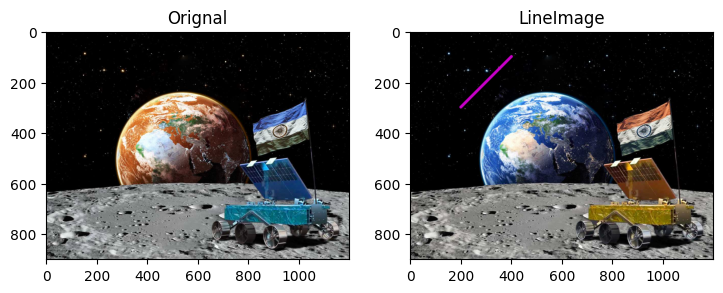

In [30]:
imageLine = image.copy()

# The line starts from (200,100) and ends at (400,100)
# The color of the line is YELLOW (Recall that OpenCV uses BGR format)
# Thickness of line is 5px
# Linetype is cv2.LINE_AA

cv2.line(imageLine, (200, 300), (400, 100), (200, 0, 200), thickness=10, lineType=cv2.LINE_AA);

# Display the image
plt.figure(figsize=[18,5])
plt.subplot(141);plt.imshow(image);plt.title("Orignal");
plt.subplot(142);plt.imshow(imageLine[:,:,::-1]);plt.title("LineImage");
#plt.imshow(imageLine[:,:,::-1])

# Drawing a Circle

Let's start off by drawing a circle on an image. We will use cv2.circle function for this.

**Functional syntx**
`img = cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]])`

* img: The output image that has been annotated.

The function has 4 required arguments:

* img: Image on which we will draw a circle
* center: Center of the circle
* radius: Radius of the circle
* color: Color of the circle which will be drawn
Next, let's check out the (optional) arguments which we are going to use quite extensively.

thickness: Thickness of the circle outline (if positive). If a negative value is supplied for this argument, it will result in a filled circle.
lineType: Type of the circle boundary. This is exact same as lineType argument in cv2.line
OpenCV Documentation
circle: https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#gaf10604b069374903dbd0f0488cb43670

Let's see an example of this.

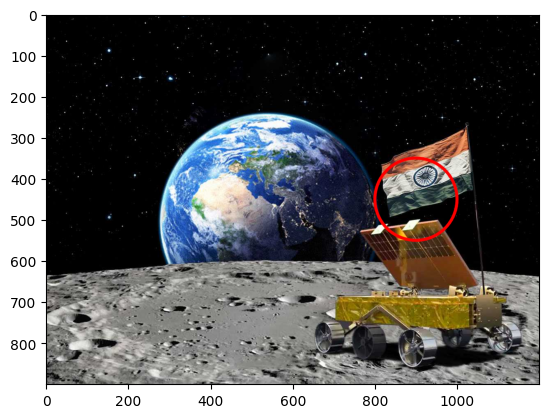

In [33]:
# Draw a circle
imageCircle = image.copy()

cv2.circle(imageCircle, (900,450), 100, (0, 0, 255), thickness=5, lineType=cv2.LINE_AA);

# Display the image
plt.imshow(imageCircle[:,:,::-1])

# Drawing a Rectangle
We will use cv2.rectangle function to draw a rectangle on an image. The function syntax is as follows.

**Functional syntx**
`img = cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]])`

img: The output image that has been annotated.

The function has 4 required arguments:

* img: Image on which the rectangle is to be drawn.
* pt1: Vertex of the rectangle. Usually we use the top-left vertex here.
* pt2: Vertex of the rectangle opposite to pt1. Usually we use the bottom-right vertex here.
* color: Rectangle color
Next, let's check out the (optional) arguments which we are going to use quite extensively.

thickness: Thickness of the circle outline (if positive). If a negative value is supplied for this argument, it will result in a filled rectangle.
lineType: Type of the circle boundary. This is exact same as lineType argument in cv2.line
OpenCV Documentation Links
rectangle:https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga07d2f74cadcf8e305e810ce8eed13bc9

Let's see an example of this.

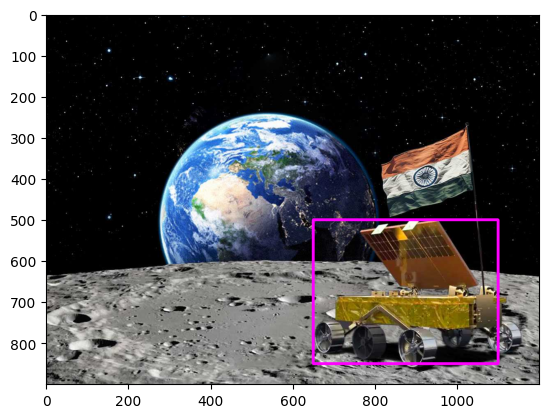

In [34]:
# Draw a rectangle (thickness is a positive integer)
imageRectangle = image.copy()

cv2.rectangle(imageRectangle, (650, 850), (1100,500), (255, 0, 255), thickness=5, lineType=cv2.LINE_8);

# Display the image
plt.imshow(imageRectangle[:,:,::-1])

# Adding Text

Finally, let's see how we can write some text on an image using cv2.putText function.

**Functional syntx**
`img = cv2.putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])`

img: The output image that has been annotated.

The function has 6 required arguments:

* img: Image on which the text has to be written.
* text: Text string to be written.
* org: Bottom-left corner of the text string in the image.
* fontFace: Font type
* fontScale: Font scale factor that is multiplied by the font-specific base size.
* color: Font color
Other optional arguments that are important for us to know include:

thickness: Integer specifying the line thickness for the text. Default value is 1.
lineType: Type of the line. Default value is 8 which stands for an 8-connected line. Usually, cv2.LINE_AA (antialiased or smooth line) is used for the lineType.
OpenCV Documentation
putText:https://docs.opencv.org/4.5.1/d6/d6e/group__imgproc__draw.html#ga5126f47f883d730f633d74f07456c576

Let's see an example of this.

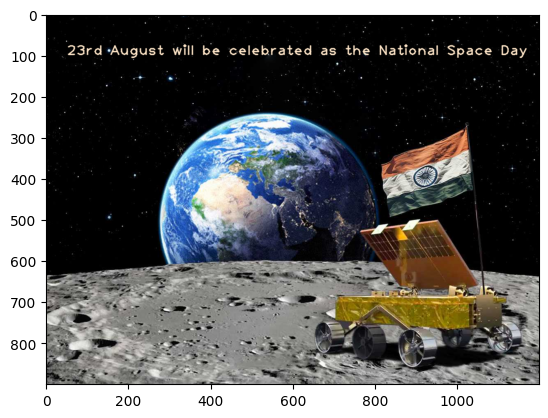

In [37]:
imageText = image.copy()
text = "23rd August will be celebrated as the National Space Day"
fontScale = 2.3
fontFace = cv2.FONT_HERSHEY_PLAIN
fontColor = (200, 230,255)
fontThickness = 2

cv2.putText(imageText, text, (50, 100), fontFace, fontScale, fontColor, fontThickness, cv2.LINE_AA);

# Display the image
plt.imshow(imageText[:,:,::-1])

## Image Thresholding
Binary Images have a lot of use cases in Image Processing. One of the most common use cases is that of creating masks. Image Masks allow us to process on specific parts of an image keeping the other parts intact. Image Thresholding is used to create Binary Images from grayscale images. You can use different thresholds to create different binary images from the same original image. 

### <font color="green">Function Syntax </font>

``` python
retval, dst = cv2.threshold( src, thresh, maxval, type[, dst] )
```

`dst`: The output array of the same size and type and the same number of channels as `src`.

The function has **4 required arguments**:

1. `src`: input array (multiple-channel, 8-bit or 32-bit floating point).
2. `thresh`: threshold value.
3. `maxval`: maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.
4. `type`: thresholding type (see ThresholdTypes).


### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

https://docs.opencv.org/4.5.1/d7/d1b/group__imgproc__misc.html#gae8a4a146d1ca78c626a53577199e9c57
https://docs.opencv.org/4.5.1/d7/d4d/tutorial_py_thresholding.html

(572, 800)


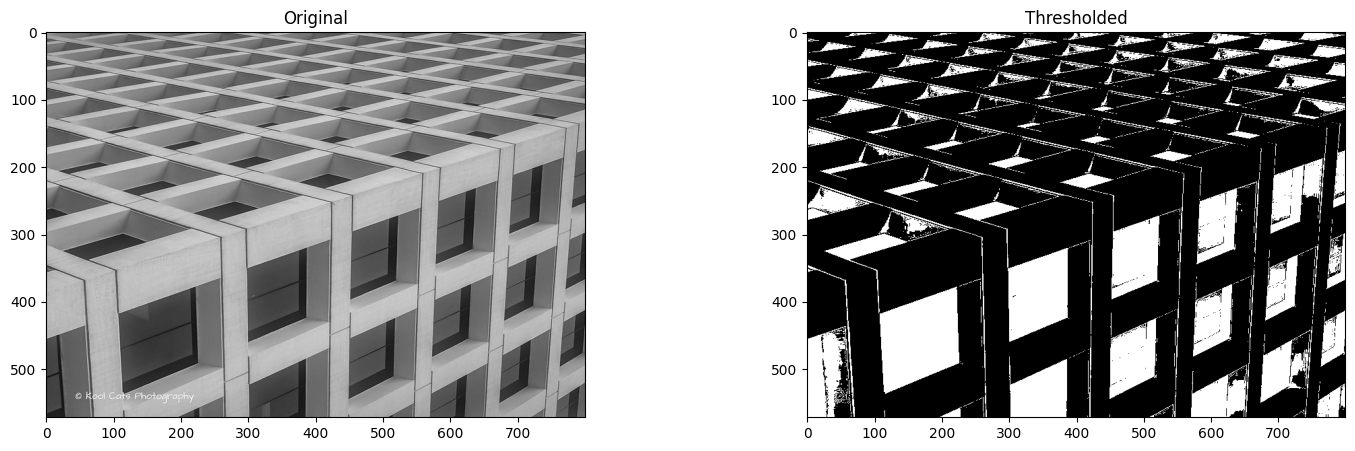

In [50]:
img_read = cv2.imread("building-windows.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY_INV)

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(121); plt.imshow(img_read, cmap="gray");         plt.title("Original");
plt.subplot(122); plt.imshow(img_thresh, cmap="gray");       plt.title("Thresholded");

print(img_thresh.shape)